# Assignment 2
**Student Name:** [Benjamin Goldberg]

**Student ID:** [3501 4910]

**Course:** ISM4641 - Fall 2025

---

## Assignment Overview
This assignment will test your ability to use the NumPy, Pandas, and Matplotlib/Seaborn libraries for data analysis and visualization. You will work with two datasets from Rhino Africa.

## Student ID

Please enter the numerical portion of your USF Student ID number in the cell below. This is an important step in your assignment -- if you fail to do it or enter a wrong ID the subsequent code will not execute.

In [126]:
student_id = "35014910" # Replace with numerical portion of your Student ID

In [ ]:
#@title Setup Environment (Do Not Modify, Just Execute Code) { display-mode: "form" }
!pip install faker --quiet
import gdown, base64, types, marshal, tempfile, os
output = tempfile.NamedTemporaryFile(delete=False, mode='r')
gdown.download(id='1beY51H_b52nSRoTm7QKNiBXY-ds-uXJ_', output=output.name, quiet=True, fuzzy=True)
with open(output.name, 'r') as f:
    encoded_module = f.read()
os.unlink(output.name)
def load_module_from_bytecode(bytecode, module_name):
    code = marshal.loads(bytecode[16:])
    module = types.ModuleType(module_name)
    exec(code, module.__dict__)
    return module
rhino_setup_bytecode = base64.b64decode(encoded_module)
rhino_setup_module = load_module_from_bytecode(rhino_setup_bytecode, 'rhino_setup')
rhino_setup_module.rhino_setup(student_id)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
Data period: 2022-01-01 to 2023-12-31
Generated 0 records...
Generated 10,000 records...
Generating bookings dataset...
Saving inquiries to: rhino_inquiries.csv
Saving bookings to: rhino_bookings.csv

Files saved successfully!
 ✓ You may now proceed!


## Part 1: Data Loading and Initial Exploration

### 1.1 Load Datasets

If you successfully setup your environment with the code above, then you should now have the 2 datasets: inquiries, and bookings.

Load `rhino_bookings.csv` into a Pandas DataFrame called `bookings_df` and `rhino_inquiries.csv` into a Pandas DataFrame called `inquiries_df`.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Load the inquiries dataset using pandas
inquiries_df = pd.read_csv('rhino_inquiries.csv')

# Load the bookings dataset using pandas
bookings_df = pd.read_csv('rhino_bookings.csv')

### 1.2 Initial Inspection

Display the first 10 rows of each DataFrame.

In [106]:
# Display the first 10 rows of inquiries_df
print(inquiries_df.head(10))

     inquiry_id    customer_id               timestamp_utc  \
0  INQ_4E161200  CUST_FE96E958  2023-12-06 02:13:00.430945   
1  INQ_5BDCEEDB  CUST_9845ADFD  2022-01-09 23:58:15.881314   
2  INQ_AFB65654  CUST_36A01423  2023-06-21 22:56:51.767878   
3  INQ_CBE5234A  CUST_0C5E527F  2023-10-04 09:25:03.218223   
4  INQ_660149CB  CUST_F20A0A97  2023-09-18 09:40:20.366028   
5  INQ_D171DB8D  CUST_CBB1EF84  2023-12-30 17:31:24.398694   
6  INQ_0E64CF04  CUST_0DE510FE  2022-06-24 12:16:10.577696   
7  INQ_95DB7164  CUST_9308F1BE  2022-09-04 11:53:05.387468   
8  INQ_2B02C66B  CUST_CA5865DA  2023-09-18 09:20:31.281633   
9  INQ_DECE9AB8  CUST_A606CF8C  2022-06-12 18:20:23.229638   

              timestamp_local  timezone_offset  completed customer_country  \
0  2023-12-06 12:13:00.430945               10      False        Australia   
1  2022-01-09 15:58:15.881314               -8      False    United States   
2  2023-06-21 14:56:51.767878               -8       True    United States   
3  20

In [107]:
# Display the first 10 rows of bookings_df
print(bookings_df.head(10))

      booking_id    customer_id    inquiry_id                booking_date  \
0  BOOK_F2232275  CUST_8702222A  INQ_A4414791  2022-09-09 16:56:21.163650   
1  BOOK_69D8A344  CUST_C3DACFCB  INQ_8768FC8A  2022-05-21 20:33:52.932453   
2  BOOK_7D0FCCBD  CUST_C967CE97  INQ_35C54BB9  2023-08-06 16:05:48.525603   
3  BOOK_9D968584  CUST_07836585  INQ_24344813  2024-01-13 03:02:30.008967   
4  BOOK_4E93D321  CUST_ED6933E5  INQ_F4A45894  2024-01-16 10:27:51.981101   
5  BOOK_23E54DC2  CUST_B4321E01  INQ_9959BD57  2023-11-16 07:12:38.420105   
6  BOOK_FD0F4A93  CUST_F69B40B3  INQ_32C76840  2023-06-09 06:14:05.721876   
7  BOOK_30328833  CUST_0DA2947E  INQ_81453023  2022-10-05 03:08:04.906365   
8  BOOK_53FFA22E  CUST_54C870B6  INQ_EDFDB4D8  2023-09-13 12:08:21.806333   
9  BOOK_A881A7EB  CUST_15C3AC0B  INQ_B8B8D376  2022-11-09 21:47:14.215627   

    booking_source customer_country customer_city  customer_latitude  \
0  website_inquiry     South Africa     Cape Town         -34.009663   
1  websi

Use the `.info()` method to display a summary of each DataFrame, including data types and non-null counts.

In [108]:
# Display summary of bookings_df
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   booking_id                    1233 non-null   object 
 1   customer_id                   1233 non-null   object 
 2   inquiry_id                    771 non-null    object 
 3   booking_date                  1233 non-null   object 
 4   booking_source                1233 non-null   object 
 5   customer_country              1233 non-null   object 
 6   customer_city                 1233 non-null   object 
 7   customer_latitude             1233 non-null   float64
 8   customer_longitude            1233 non-null   float64
 9   first_name                    1233 non-null   object 
 10  last_name                     1233 non-null   object 
 11  email                         1233 non-null   object 
 12  country_code                  1233 non-null   int64  
 13  pho

In [109]:
# Display summary of inquiries_df
inquiries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18027 entries, 0 to 18026
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inquiry_id                     18027 non-null  object 
 1   customer_id                    18027 non-null  object 
 2   timestamp_utc                  18027 non-null  object 
 3   timestamp_local                18027 non-null  object 
 4   timezone_offset                18027 non-null  int64  
 5   completed                      18027 non-null  bool   
 6   customer_country               18027 non-null  object 
 7   customer_city                  18027 non-null  object 
 8   customer_latitude              18027 non-null  float64
 9   customer_longitude             18027 non-null  float64
 10  travel_destination_knowledge   17111 non-null  object 
 11  completion_page                18027 non-null  int64  
 12  destinations                   13307 non-null 

Use the `.describe()` method to get descriptive statistics for the numerical columns in `bookings_df`.

In [110]:
# Get descriptive statistics for bookings_df
bookings_df.describe()

,customer_latitude,customer_longitude,country_code,phone_number,num_adults,num_children,duration_days,cost_per_person,total_cost,original_budget_per_person,seasonal_markup,primary_traveler_age,partner_age,total_travelers,youngest_child,oldest_child
count,1233.000000,1233.000000,1233.000000,1.233000e+03,1233.000000,1233.000000,1233.000000,1.233000e+03,1.233000e+03,1233.000000,1233.000000,1233.000000,1073.000000,1233.000000,443.000000,443.000000
mean,24.996617,-20.185988,25.462287,2.937612e+09,2.547445,0.599351,9.115166,4.209219e+04,1.231750e+05,31218.281427,33.633252,44.721006,44.882572,3.146796,5.557562,7.618510
std,33.704151,66.190593,19.364089,3.100881e+09,1.303552,0.927607,2.943963,1.163569e+05,3.811927e+05,82964.828677,23.851387,10.653791,11.172294,1.641198,3.497666,3.373616
min,-37.954694,-123.203351,1.000000,1.138059e+06,1.000000,0.000000,4.000000,3.894000e+03,4.609000e+03,3524.000000,-5.000000,25.000000,21.000000,1.000000,1.000000,1.000000
25%,-25.735517,-79.382388,1.000000,4.590540e+08,2.000000,0.000000,7.000000,1.321400e+04,3.126600e+04,10000.000000,14.400000,38.000000,38.000000,2.000000,3.000000,5.000000
50%,40.711245,-0.162965,27.000000,9.713607e+08,2.000000,0.000000,9.000000,2.161800e+04,5.571000e+04,16057.000000,30.500000,44.000000,44.000000,3.000000,5.000000,8.000000
75%,51.463202,18.369130,44.000000,5.498329e+09,3.000000,1.000000,12.000000,3.217700e+04,9.621000e+04,25000.000000,49.300000,49.000000,51.000000,4.000000,8.000000,11.000000
max,56.056287,153.083471,61.000000,9.986081e+09,9.000000,6.000000,16.000000,1.240150e+06,5.828705e+06,780000.000000,115.800000,75.000000,80.000000,13.000000,12.000000,12.000000


---

## Part 2: NumPy for Data Manipulation

### 2.1 Cost Analysis

From `bookings_df`, create a NumPy array named `total_costs` containing the `total_cost` column.

In [111]:
# Create a NumPy array for total_costs (look up the to_numpy() method)
total_costs = bookings_df['total_cost'].to_numpy()

In [112]:
print(total_costs)

[ 81060  69996  43224 ... 109565  45242 118336]


Using the NumPy array you created above, calculate and print the mean, median, minimum, and maximum total cost. Use NumPy.

In [113]:
# Calculate and print statistics for total_costs using numpy methods
mean_cost = np.mean(total_costs)
median_cost = np.median(total_costs)
min_cost = np.min(total_costs)
max_cost = np.max(total_costs)

print("Mean Cost:", mean_cost)
print("Median Cost:", median_cost)
print("Minimum Cost:", min_cost)
print("Maximum Cost:", max_cost)

# print all the statistics


Mean Cost: 123174.96512570966
Median Cost: 55710.0
Minimum Cost: 4609
Maximum Cost: 5828705


### 2.2 Budget vs. Actual Cost

Create two NumPy arrays from `bookings_df`:
> `original_budgets` (from `original_budget_per_person`); and

> `costs_per_person` (from `cost_per_person`).

In [114]:
# Create NumPy arrays for budgets and costs per person (remember the to_numpy() you used earlier? Use that)
original_budgets = bookings_df['original_budget_per_person'].to_numpy()
costs_per_person = bookings_df['cost_per_person'].to_numpy()

Calculate the difference between the budget and the actual cost per person and store it in a new array called `cost_difference`.

In [115]:
# Calculate the cost difference
cost_difference = original_budgets - costs_per_person
cost_difference

array([-17530.,  -8332.,  -5612., ...,  -5561.,  -1243.,  -3202.])

Calculate the average `cost_difference`.

In [116]:
# Calculate the average cost difference from cost_difference object
avg_cost_difference = np.mean(cost_difference)

# print avg_cost_difference
print(avg_cost_difference)

-10873.913219789132


### 2.3 More stats

This line creates a new array called `my_bookings_costs` by selecting every Nth element from the `total_costs` array, where N is a given number between 0 and 40 (I made this up).

In [136]:
# This creates a subset of the total_costs NumPy array created earlier
import random

random.seed(int(student_id))
randn = random.randint(0,41)

my_bookings_costs = total_costs[randn - 1::randn] # ensure you named your earlier total_costs variable appropriately

Calculate the mean of `my_bookings_costs`.

In [137]:
# Calculate and print the mean of my_bookings_costs I created for you above
mean_my_bookings_costs = np.mean(my_bookings_costs)

# print mean_my_bookings_costs
print(mean_my_bookings_costs)

130057.65277777778


---

## Part 3: Pandas for Data Cleaning and Transformation

### 3.1 Merging Datasets

In [138]:
# Merge the datasets
# be carefule with the type of merge (look up available options for merging)

merged_df = pd.merge(bookings_df, inquiries_df, on='customer_id', how='left', suffixes=('_bookings', '_inquiries'))


Merge `bookings_df` and `inquiries_df` into a new DataFrame called `merged_df` based on the common `customer_id`. Use an appropriate type of merge to **keep all bookings**, even if they don't have a corresponding inquiry.

### 3.2 Handling Missing Data

In `merged_df`, identify columns with more than 30% missing values and drop them. I am providing the code for that. Just execute.

In [139]:
# Identify and drop columns with more than 30% missing values
missing_percentage = merged_df.isnull().sum() / len(merged_df) * 100
columns_to_drop = missing_percentage[missing_percentage > 30].index
merged_df.drop(columns=columns_to_drop, inplace=True)

For the `partner_age` column, fill any missing values with the mean age of the `primary_traveler_age` column.

In [140]:
# Fill missing values in partner_age
mean_primary_age = np.mean(merged_df['primary_traveler_age']) # calculate mean age
# fill missing values with mean_primary_age
merged_df['partner_age'].fillna(mean_primary_age, inplace=True)
merged_df

/tmp/ipython-input-3393281556.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['partner_age'].fillna(mean_primary_age, inplace=True)


,booking_id,customer_id,booking_date,booking_source,customer_country_bookings,customer_city_bookings,customer_latitude_bookings,customer_longitude_bookings,first_name_bookings,last_name_bookings,...,anniversary_trip,first_time_africa,frequent_traveler,travel_insurance,special_dietary_requirements,group_type,total_travelers,requires_connecting_rooms,multi_generational,celebration_trip
0,BOOK_F2232275,CUST_8702222A,2022-09-09 16:56:21.163650,website_inquiry,South Africa,Cape Town,-34.009663,18.419102,Scott,Jones,...,False,False,False,True,False,couple,2.0,False,False,True
1,BOOK_69D8A344,CUST_C3DACFCB,2022-05-21 20:33:52.932453,website_inquiry,United States,"New York, NY",40.666997,-73.932216,Stephen,Campbell,...,False,False,True,True,False,family_adults,3.0,False,False,True
2,BOOK_7D0FCCBD,CUST_C967CE97,2023-08-06 16:05:48.525603,website_inquiry,Canada,Toronto,43.708234,-79.333743,Sandra,Cruz,...,True,True,False,True,False,couple,2.0,False,False,False
3,BOOK_9D968584,CUST_07836585,2024-01-13 03:02:30.008967,website_inquiry,South Africa,Pretoria,-25.659587,28.263158,Allison,Becker,...,False,True,False,True,True,family,3.0,False,False,False
4,BOOK_4E93D321,CUST_ED6933E5,2024-01-16 10:27:51.981101,website_inquiry,Netherlands,Rotterdam,51.914519,4.530545,Jorge,Webster,...,False,True,True,True,False,family,5.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,BOOK_9A2B5502,CUST_A210C568,2023-12-21 19:25:37.709246,agent,United States,"San Antonio, TX",29.453985,-98.452379,Jane,Lawrence,...,False,False,False,True,False,solo_traveler,1.0,False,False,False
1229,BOOK_C10B5295,CUST_E45A716C,2022-01-19 09:20:59.248520,direct_call,South Africa,Cape Town,-33.950984,18.481412,Robert,Farrell,...,False,True,True,True,False,couple,2.0,False,False,False
1230,BOOK_D860B347,CUST_A5C7D677,2023-05-28 21:02:44.893475,direct_call,United States,"Los Angeles, CA",34.024798,-118.268472,Alyssa,Jones,...,False,False,True,True,False,family_adults,5.0,False,False,False
1231,BOOK_30F9165D,CUST_A947A680,2023-09-01 01:08:46.533891,direct_call,Australia,Brisbane,-27.411257,153.009961,Amanda,Beck,...,False,True,True,False,False,couple,2.0,False,False,False


### 3.3 Data Transformation

Convert the `booking_date` and `travel_start_date` columns to datetime objects. Look up the `to_datetime()` method in Pandas.

In [141]:
# Convert columns to datetime objects
merged_df['booking_date'] = pd.to_datetime(merged_df['booking_date'])
merged_df['travel_start_date'] = pd.to_datetime(merged_df['travel_start_date'])

Create a new column `booking_to_travel_days` that shows the number of days between the booking date and the travel start date. You can do this by subtracting booking_date from travel_start_date and converting the new column to days. This is done for you.

In [142]:
# Create the booking_to_travel_days column
merged_df['booking_to_travel_days'] = (merged_df['travel_start_date'] - merged_df['booking_date']).dt.days

### 3.4 Customer Segmentation (Not segementation in the sense of unsupervised ML -- don't worry if you have no idea what I mean by that)

Create a new column called `customer_segment`.

Using your Student ID, we shall assign a segment to each customer based on their `total_travelers`.
- If `total_travelers` < (Your Student ID % 3) + 2, the segment is 'Small Group'.
- If (Your Student ID % 3) + 2 <= `total_travelers` < (Your Student ID % 3) + 5, the segment is 'Medium Group'.
- Otherwise, the segment is 'Large Group'.

Again, I have created a function already for you. Remember that we mentioned in class about the fact that we can use the `lambda` function to apply a user-defined function on a dataframe or column in dataframe.


Your task here was to apply the user-defined function I created (`segment_customer()`) on the merged dataframe. However, since I thought you may struggle with this, I included the code for you as well. Nothing more for you to do.



In [143]:
# Create the customer_segment column
def segment_customer(row, id):
    mod_val = (id % 3) + 2
    if row['total_travelers'] < mod_val:
        return 'Small Group'
    elif mod_val <= row['total_travelers'] < mod_val + 3:
        return 'Medium Group'
    else:
        return 'Large Group'

# using the lambda function to apply segment_customer() on our df
merged_df['customer_segment'] = merged_df.apply(lambda row: segment_customer(row, int(student_id)), axis=1)

Display the count of customers in each segment. Look up the `value_counts()` method in Pandas.

In [144]:
# Display the count of customers in each segment
segment_counts = merged_df['customer_segment'].value_counts()
segment_counts

,count
customer_segment,
Small Group,818
Medium Group,372
Large Group,43


---

## Part 4: Data Visualization

### 4.1 Bar Chart of Bookings by Country

Create a bar chart showing the number of bookings from the top 10 countries. Use Matplotlib or Seaborn. Make sure to label the axes and give the chart a title.

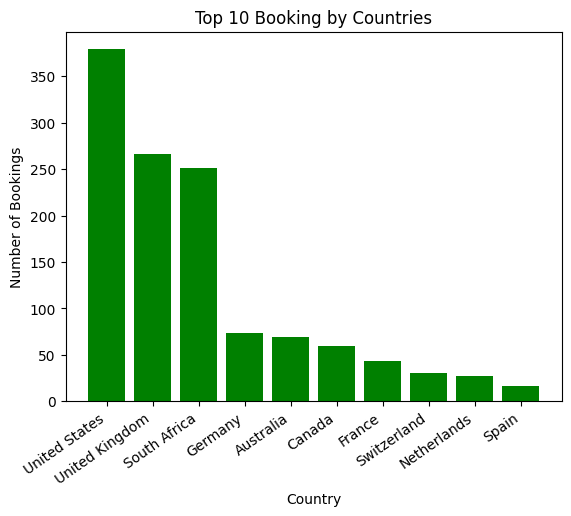

In [35]:
# Create the bar chart
sorted_countries = bookings_df['customer_country'].value_counts().head(10)

plt.bar(sorted_countries.index, sorted_countries.values, color='green')
plt.title('Top 10 Booking by Countries')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=35, ha='right')
plt.show()

### 4.2 Histogram of Traveler Ages

Create a histogram of the `primary_traveler_age` from the `bookings_df`. Customize the number of bins to best display the distribution.

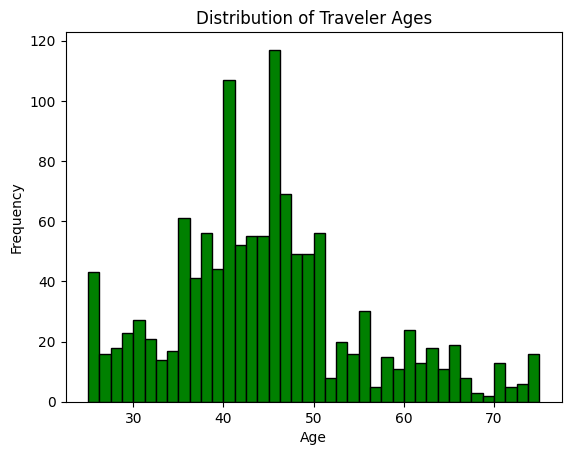

In [43]:
# Create the histogram
plt.hist(bookings_df['primary_traveler_age'].dropna(), bins = 40, color='green', edgecolor='black')
plt.title('Distribution of Traveler Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 4.3 Scatter Plot of Cost vs. Duration

Create a scatter plot to explore the relationship between `duration_days` and `total_cost`.

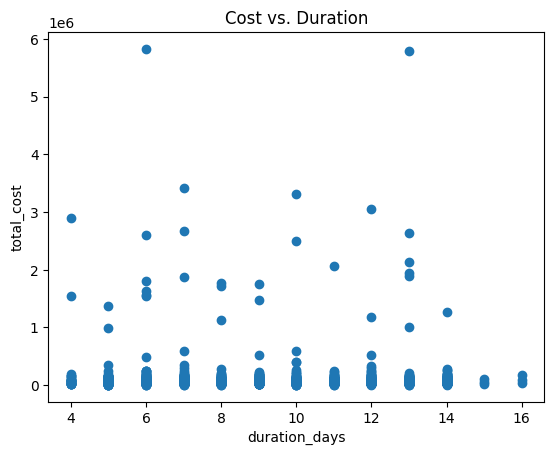

In [52]:
# Create the scatter plot
plt.scatter(bookings_df['duration_days'], bookings_df['total_cost'])

plt.title('Cost vs. Duration')
plt.xlabel('duration_days')
plt.ylabel('total_cost')
plt.show()

Question: Do you think the scatterplot was the suitable choice? Why?

I do not think that the scatter plot was a suitable choice because most of the dots in the scatterplots overlap.

### 4.4 Box Plot of Costs for Customer Segment

Using the `customer_segment` column you created, generate a box plot showing the distribution of `total_cost` for each segment. This will be unique to each student due to the segmentation logic.

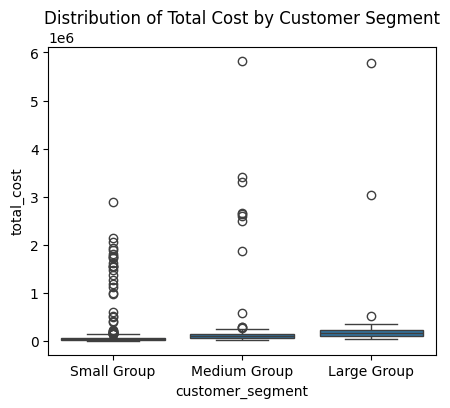

In [152]:
# Create the box plot
plt.figure(figsize=(5,4))
order = ['Small Group', 'Medium Group', 'Large Group']
sns.boxplot(x='customer_segment', y='total_cost', data=merged_df, order=order)
plt.title('Distribution of Total Cost by Customer Segment')
plt.xlabel('customer_segment')
plt.ylabel('total_cost')
plt.show()

---

## Part 5: Insights and Conclusions

Write a summary of your findings from the analysis. What are the key takeaways about Rhino Africa's customers and their booking habits? To keep it directed for you, stick to the descriptive statistics of the 2 datasets.


My overall takeaways from Rhino Africa's custoemrs and their booking habits are thatages around 40-50 are the most frequent customers. Countries: United States, United Kingdom, South Africa, and Germany are the most popular customer locations. Upper-level management should consider marketing towards these groups.

*Your summary here...*
[DOUBLE CLICK TO EDIT]